In [38]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, width * height).astype('float32')/255.
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이너 shape :', X_test.shape, Y_test.shape)

학습후 테스트 데이너 shape : (10000, 784) (10000, 10)


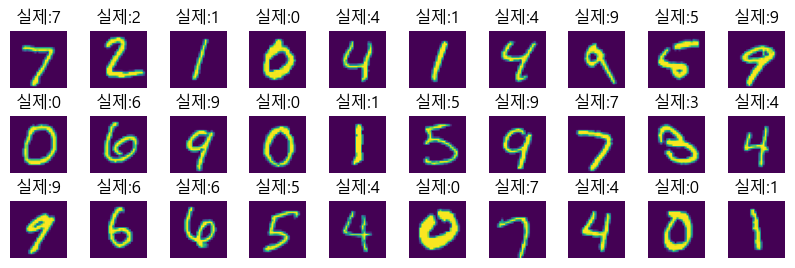

In [29]:
# 모델 학습 후 틀린 데이터 출력 용 (X_test와 Y_test)
plt_row=3
plt_col=10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
# plt.rc('font',family='NanumBarunGothic') # 코랩 os
plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)

plt.subplots_adjust(hspace=.4, wspace=.4)

for i in range(plt_row*plt_col):
#     X_test[i]를 axarr[적절한 곳]에 출력(imshow) Y_test[i].argmax()의 실제값을 title에 출력
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    sub_plot.set_title('실제:'+str(y_test[i]))
#     sub_plot.set_title('실제:'+str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

(50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)
Epoch 1/1000
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2275 - accuracy: 0.9320 - val_loss: 0.1258 - val_accuracy: 0.9615
Epoch 2/1000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0951 - accuracy: 0.9701 - val_loss: 0.0919 - val_accuracy: 0.9709
Epoch 3/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.1099 - val_accuracy: 0.9685
Epoch 4/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.0844 - val_accuracy: 0.9766
Epoch 5/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0801 - val_accuracy: 0.9785
Epoch 6/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.1028 - val_accuracy: 0.9751
Epoch 7/1000
1000/1000 [=========================

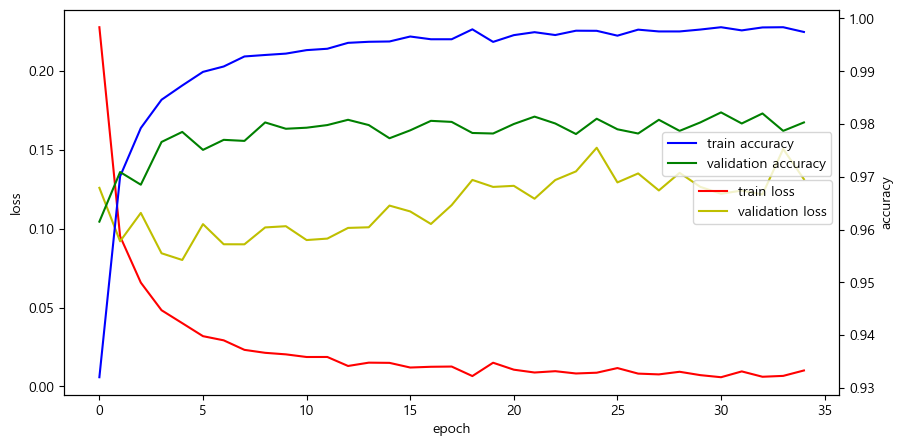

In [40]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width * height).astype('float32')/255.
Y_train = utils.to_categorical(y_train)
X_test = X_test.reshape(10000, width * height).astype('float32')/255.
Y_test = utils.to_categorical(y_test)
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
X_train = X_train[:50000]
Y_val = Y_train[50000:]
Y_train = Y_train[:50000]
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델구성
model = Sequential()
model.add(Input(shape=(width*height,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                 epochs=1000,
                 callbacks=[early_stop],
                 batch_size=50,
                 validation_data=[X_val, Y_val]
                )
# 5. 학습 평가
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [34]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [41]:
# 모델 평가
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.1225 - accuracy: 0.9803


(0.1225222796201706, 0.9803000092506409)

In [44]:
# 성능평가지표 = 교차표
y_hat = model.predict(X_test).argmax(axis=1)
# print('예측치 :', y_hat)
# print('실제값 :', y_test)
ctap = pd.crosstab(y_test, y_hat)
ctap.columns.name = '예측'
ctap.index.name = '실측'
ctap

313/313 [==============================] - 1s 2ms/step


예측,0,1,2,3,4,5,6,7,8,9
실측,,,,,,,,,,
0,971,1,0,1,1,1,2,1,1,1
1,0,1129,3,0,0,1,1,0,1,0
2,3,1,1012,5,1,0,1,4,5,0
3,1,0,3,988,0,4,0,4,9,1
4,3,2,1,0,957,0,8,0,0,11
5,4,0,0,4,1,875,4,1,2,1
6,4,4,0,1,3,2,943,0,1,0
7,3,4,7,0,1,0,0,1008,2,3
8,2,1,5,1,2,6,3,3,948,3


In [50]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_hat)
cmatrix

array([[ 971,    1,    0,    1,    1,    1,    2,    1,    1,    1],
       [   0, 1129,    3,    0,    0,    1,    1,    0,    1,    0],
       [   3,    1, 1012,    5,    1,    0,    1,    4,    5,    0],
       [   1,    0,    3,  988,    0,    4,    0,    4,    9,    1],
       [   3,    2,    1,    0,  957,    0,    8,    0,    0,   11],
       [   4,    0,    0,    4,    1,  875,    4,    1,    2,    1],
       [   4,    4,    0,    1,    3,    2,  943,    0,    1,    0],
       [   3,    4,    7,    0,    1,    0,    0, 1008,    2,    3],
       [   2,    1,    5,    1,    2,    6,    3,    3,  948,    3],
       [   3,    6,    2,    2,    8,    4,    1,    8,    3,  972]],
      dtype=int64)

In [52]:
cnt = 0
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt+=data
print('예측이 틀린 갯수 :',cnt)

예측이 틀린 갯수 : 197


In [55]:
# y_hat : 예측값
# y_test : 실제값
cnt=0
for y, h in zip(y_test,y_hat):
    if y != h :
        cnt += 1
print('예측이 틀린 갯수 :',cnt)

예측이 틀린 갯수 : 197


i = 3812
cnt = 100


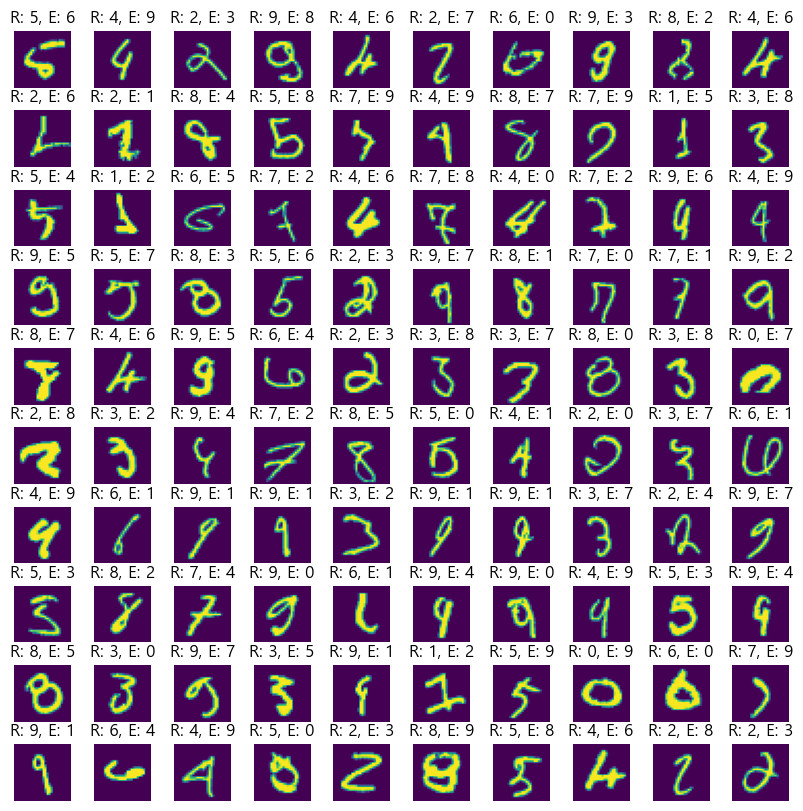

In [59]:
# 모델 학습 후 틀린 데이터 출력 용 (X_test와 Y_test)
plt_row=10
plt_col=10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)

plt.subplots_adjust(hspace=.4, wspace=.4)

i = 0 # y_hat과 y_test를 액세스할 index
cnt = 0 # 출력할 횟수

while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if y_hat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, E: {}'.format(y_test[i], y_hat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

#  CNN
- 컨볼류션 레이어 -> max pooling -> DNN(교안 35pg)

In [69]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width, height, 1).astype('float32') / 255.0
X_test = X_test.reshape(10000, width, height, 1).astype('float32') / 255.0
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
X_train = X_train[:50000]
Y_val = Y_train[50000:]
Y_train = Y_train[:50000]
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델생성
    # Conv(3*3 커널 32) 28*28 => 26*26*32
    # MaxPooling (2*2) 13*13*32
    # Dropout
    # Conv(3*3 커널 64) 11*11*32*64
    # MaxPooling (2*2) 6*6*32*32*64
    # 1차원 데이터로 만들기
    # DNN(hidden layer 128 units 한층 - output layer)
model = Sequential()
model.add(Conv2D(32, # 커널 갯수
                 3, # 커널 사이즈
                 padding='same', # 입력층과 출력층의 갯수를 같게 (외곽에 의미없는 값으로 메꿔)
                 activation='relu',
                 input_shape = (width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 3,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

(50000, 28, 28, 1) (50000, 10) (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                           

In [70]:
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습시키기
earlystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_val, Y_val), callbacks=[earlystop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2336 - accuracy: 0.9285 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.0413 - val_accuracy: 0.9884
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0339 - val_accuracy: 0.9909
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0604 - accuracy: 0.9822 - val_loss: 0.0358 - val_accuracy: 0.9909
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0314 - val_accuracy: 0.9914
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0345 - val_accuracy:

In [80]:
model.save('model/mnist_cnn.h5')

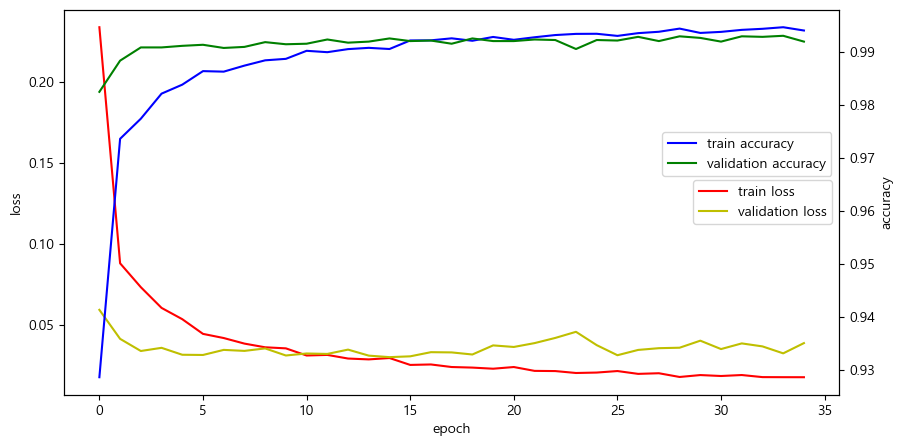

In [81]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [71]:
# 평가하기
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9939


(0.024306951090693474, 0.9939000010490417)

In [83]:
# 성능평가지표 = 교차표
y_hat = model.predict(X_test).argmax(axis=1)
# print('예측치 :', y_hat)
# print('실제값 :', y_test)
ctap = pd.crosstab(y_test, y_hat)
ctap.columns.name = '예측'
ctap.index.name = '실측'
ctap

313/313 [==============================] - 1s 2ms/step


예측,0,1,2,3,4,5,6,7,8,9
실측,,,,,,,,,,
0,976,0,1,0,0,1,0,1,1,0
1,0,1134,0,1,0,0,0,0,0,0
2,0,1,1028,0,0,0,1,2,0,0
3,0,0,1,1005,0,3,0,0,1,0
4,0,0,0,0,979,0,1,1,0,1
5,0,0,0,3,0,888,1,0,0,0
6,2,1,0,0,1,3,951,0,0,0
7,0,2,4,0,1,0,0,1019,1,1
8,1,0,1,1,0,1,0,0,969,1


In [84]:
cnt = 0
for y, h in zip(y_test, y_hat):
    if y != h:
        cnt += 1
print('예측 실패 갯수 :', cnt)

예측 실패 갯수 : 61


In [78]:
score = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


i = 10000
cnt = 61


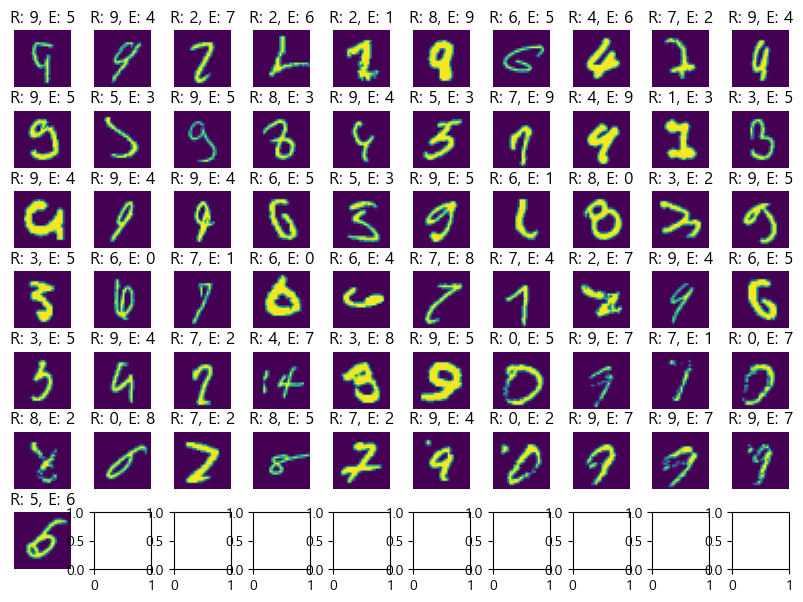

In [82]:
# 모델 학습 후 틀린 데이터 출력 용 (X_test와 Y_test)
plt_row=7
plt_col=10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)

plt.subplots_adjust(hspace=.4, wspace=.4)

i = 0 # y_hat과 y_test를 액세스할 index
cnt = 0 # 출력할 횟수

while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if score[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, E: {}'.format(y_test[i], score[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)